<a id='3'></a>
# Project to tell fake credit cards from real

<a id='3'></a>
# import  libraries

In [63]:
import pandas as pd 
import numpy as np 
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")


# We display data using panda and We make a Data schema

In [38]:
df = pd.read_csv('creditcard.csv')
df 

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [40]:
#Display the number of rows and columns
df.shape

(284807, 31)

In [41]:

df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [42]:
#Display data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [43]:

df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [44]:
#Knowing the repetition of values
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

# We reviewed and visualized the data to see if the data was balanced or not

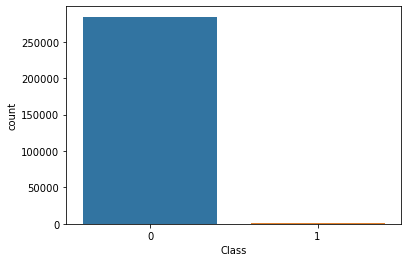

In [45]:
#Knowing the repetition of values
sns.countplot(x='Class', data=df);

In [46]:
df.columns[df.isna().any()]

Index([], dtype='object')

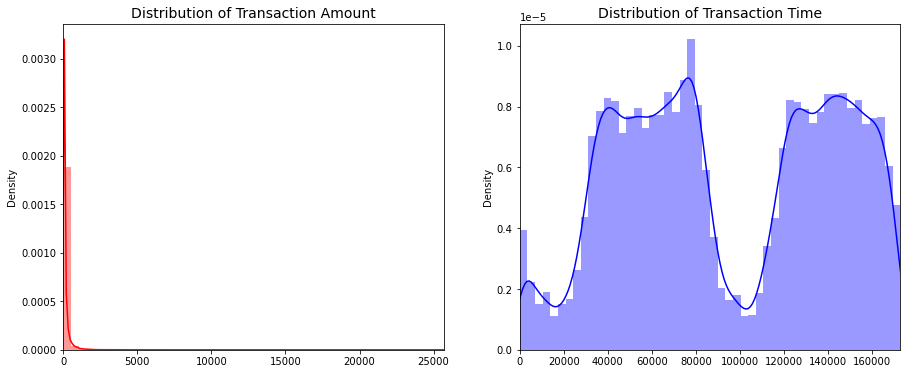

In [47]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

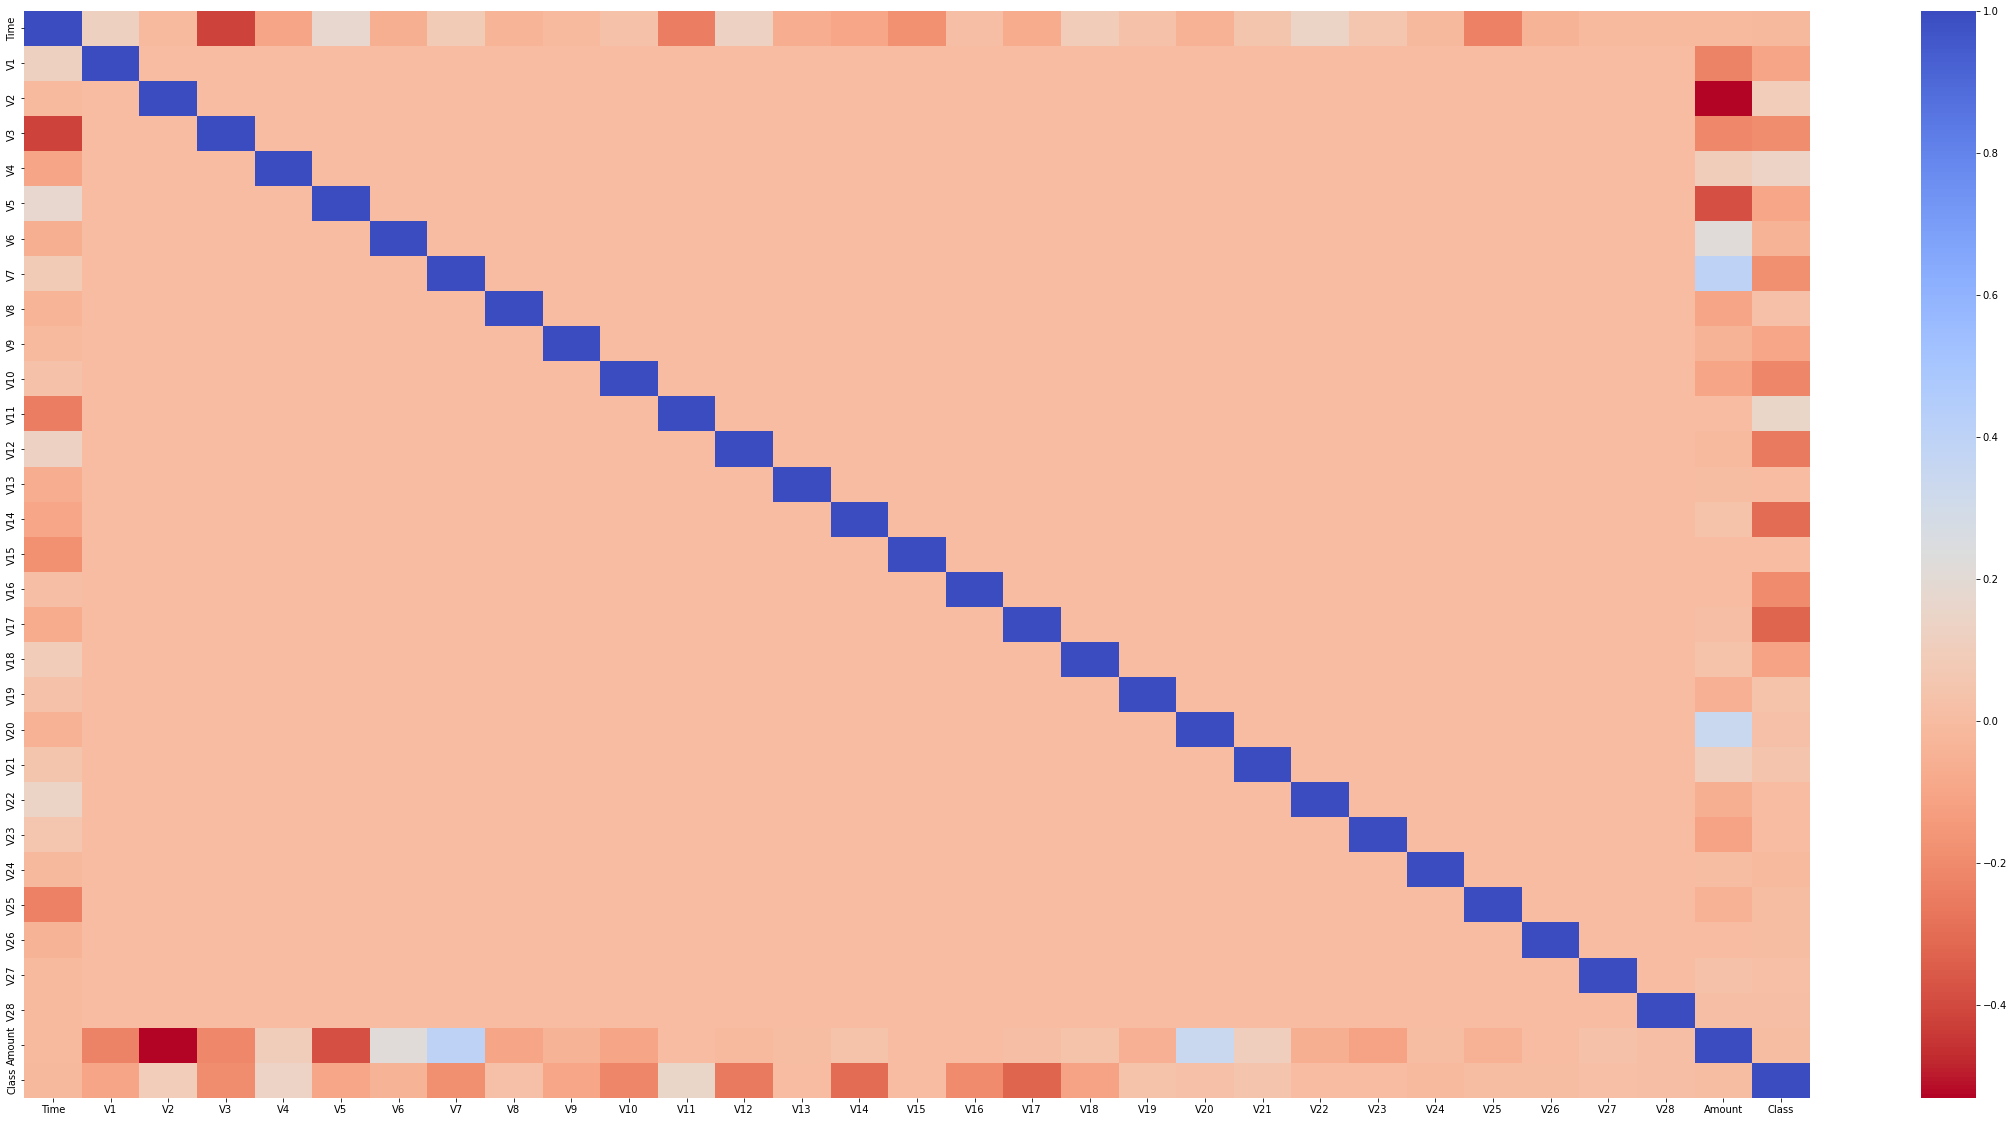

In [48]:
plt.figure(figsize=(40,20))
sns.heatmap(df.corr(), cmap='coolwarm_r', annot_kws={'size':20});

In [49]:
#We print the average of the columns corresponding to 0 and 1
legit = df[df.Class == 0]
fraud = df[df.Class == 1]
df.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


In [50]:
#We take a sample of the data
sample = legit.sample(492)
sample.count()[0]


492

In [51]:
#We are now balancing the data
balanced_df = pd.concat([sample, fraud], axis=0)
balanced_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
164508,116771.0,-0.945276,-0.456965,1.879048,0.363974,-0.711144,2.051284,0.452627,0.565710,0.678264,...,0.443954,1.076930,0.366793,0.119278,-0.136617,-0.589971,0.163175,0.200383,279.00,0
227601,145138.0,1.745528,-2.174961,-1.338095,-1.568592,-0.685231,1.081311,-1.052021,0.163015,-1.302517,...,0.186675,0.707867,0.065076,-0.310016,-0.343838,0.013534,0.026396,-0.016541,237.00,0
134630,80892.0,1.262842,1.187528,-1.923626,1.342786,1.246010,-1.047270,0.616627,-0.154017,-0.562666,...,-0.219795,-0.592129,-0.316088,-0.837673,0.918383,-0.258449,0.031320,0.077145,0.89,0
239505,150141.0,2.022812,-0.856738,-0.252408,-1.071141,-0.647817,0.668736,-1.294645,0.299848,1.730142,...,0.206508,0.793454,0.141337,-0.056490,-0.422992,0.677176,-0.002661,-0.047973,10.00,0
204712,135409.0,-2.349378,0.967721,1.046677,-0.540998,-0.149460,1.668382,-0.988895,-1.749403,-0.337890,...,-1.426039,0.106724,-0.033686,-1.039241,-0.036015,0.206062,0.212663,-0.121188,102.00,0


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96168.930894,0.016857,-0.064917,0.049870,0.117262,-0.036528,0.017489,0.015823,0.039335,-0.048550,...,0.005609,-0.028214,-0.023583,-0.047048,0.041931,0.014155,-0.001564,-0.016693,0.035181,93.446199
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


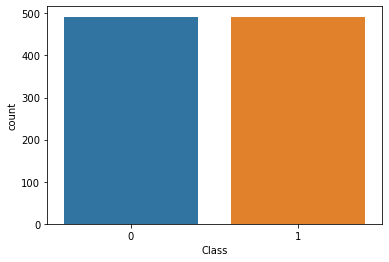

In [52]:
sns.countplot(x='Class', data=balanced_df);
balanced_df.groupby('Class').mean()

In [53]:
#We balance columns with defective data and add columns for average, highest, and lowest value
std_scaler = StandardScaler()
balanced_df['scaled_amount'] = std_scaler.fit_transform(balanced_df['Amount'].values.reshape(-1,1))
balanced_df['scaled_time'] = std_scaler.fit_transform(balanced_df['Time'].values.reshape(-1,1))
balanced_df = balanced_df.drop(["Amount", "Time"],axis=1)
FEATURES = [col for col in balanced_df.columns if col not in ['Class']]
balanced_df["mean"] = balanced_df[FEATURES].mean(axis=1)
balanced_df["std"] = balanced_df[FEATURES].std(axis=1)
balanced_df["min"] = balanced_df[FEATURES].min(axis=1)
balanced_df["max"] = balanced_df[FEATURES].max(axis=1)

In [54]:
balanced_df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,Class,scaled_amount,scaled_time,mean,std,min,max
164508,-0.945276,-0.456965,1.879048,0.363974,-0.711144,2.051284,0.452627,0.565710,0.678264,-0.980670,...,-0.589971,0.163175,0.200383,0,0.666155,0.588912,0.170999,0.842107,-1.606312,2.051284
227601,1.745528,-2.174961,-1.338095,-1.568592,-0.685231,1.081311,-1.052021,0.163015,-1.302517,1.305410,...,0.013534,0.026396,-0.016541,0,0.502702,1.178944,-0.133077,1.020327,-2.174961,1.745528
134630,1.262842,1.187528,-1.923626,1.342786,1.246010,-1.047270,0.616627,-0.154017,-0.562666,-1.363241,...,-0.258449,0.031320,0.077145,0,-0.416179,-0.157370,0.081944,1.189142,-3.116913,2.189039
239505,2.022812,-0.856738,-0.252408,-1.071141,-0.647817,0.668736,-1.294645,0.299848,1.730142,-0.322645,...,0.677176,-0.002661,-0.047973,0,-0.380725,1.283006,0.220662,0.854592,-1.294645,2.022812
204712,-2.349378,0.967721,1.046677,-0.540998,-0.149460,1.668382,-0.988895,-1.749403,-0.337890,-1.546407,...,0.206062,0.212663,-0.121188,0,-0.022684,0.976581,-0.191897,0.971747,-2.349378,1.668382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,-5.587794,...,0.788395,0.292680,0.147968,1,1.098140,1.678226,-0.919313,2.387283,-6.665177,2.115795
280143,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.739467,0.389152,0.186637,1,-0.416685,1.682490,-0.535319,1.895644,-5.210141,2.858466
280149,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,-3.463891,...,0.471111,0.385107,0.194361,1,-0.116514,1.682573,-0.555792,1.652533,-5.035326,1.794969
281144,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,-5.245984,...,0.606116,0.884876,-0.253700,1,0.533836,1.695365,-1.132703,2.321412,-6.416628,1.933520


In [55]:
#We separate the test column into a variable
X = balanced_df.drop('Class', axis=1)
y = balanced_df.Class

In [56]:
# split data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=150)

In [57]:
#We create a function that makes it easy for us to train and test any model
def model_train(model,model_name):
    model.fit(X_train,y_train)
    model_train_score = model.score(X_train, y_train)
    model_test_score = model.score(X_test, y_test)
    print(f"{model_name} model score on Train= {model_train_score *100}%\n{model_name} model score on Test= {model_test_score*100}%")
def r2(model, model_name):
    score = r2_score(y_test, model.predict(X_test))
    print(f"R2 Score for {model_name} is {score * 100}%") 

In [60]:
model_DTR = DecisionTreeClassifier()
model_train(model_DTR,'DecisionTreeClassifier')
r2(model_DTR,'DecisionTreeClassifier')

DecisionTreeClassifier model score on Train= 100.0%
DecisionTreeClassifier model score on Test= 89.43089430894308%
R2 Score for DecisionTreeClassifier is 57.67881955931979%


In [61]:
model_RFR =RandomForestClassifier()
model_train(model_RFR,'RandomForestClassifier')
r2(model_RFR,'RandomForestClassifier')

RandomForestClassifier model score on Train= 100.0%
RandomForestClassifier model score on Test= 91.46341463414635%
R2 Score for RandomForestClassifier is 65.81750810560445%


In [62]:
model_RFR =LogisticRegression()
model_train(model_RFR,'LogisticRegression')
r2(model_RFR,'LogisticRegression')

LogisticRegression model score on Train= 96.07046070460704%
LogisticRegression model score on Test= 91.869918699187%
R2 Score for LogisticRegression is 67.44524581486138%


In [64]:
model_XG = XGBClassifier()
model_train(model_XG, "XGBoost")
r2(model_XG, "XGBoost")

[11:56:31] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBoost model score on Train= 100.0%
XGBoost model score on Test= 93.08943089430895%
R2 Score for XGBoost is 72.32845894263218%


In [65]:
import joblib 
joblib.dump(model_XG, 'model')

['model']